<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [18]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127,3.524,6.981,11.700,13.370,15.780,28.110
texture_mean,569.0,19.290,4.301,9.710,16.170,18.840,21.800,39.280
perimeter_mean,569.0,91.969,24.299,43.790,75.170,86.240,104.100,188.500
area_mean,569.0,654.889,351.914,143.500,420.300,551.100,782.700,2501.000
smoothness_mean,569.0,0.096,0.014,0.053,0.086,0.096,0.105,0.163
compactness_mean,569.0,0.104,0.053,0.019,0.065,0.093,0.130,0.345
concavity_mean,569.0,0.089,0.080,0.000,0.030,0.062,0.131,0.427
concave points_mean,569.0,0.049,0.039,0.000,0.020,0.034,0.074,0.201
symmetry_mean,569.0,0.181,0.027,0.106,0.162,0.179,0.196,0.304
fractal_dimension_mean,569.0,0.063,0.007,0.050,0.058,0.062,0.066,0.097


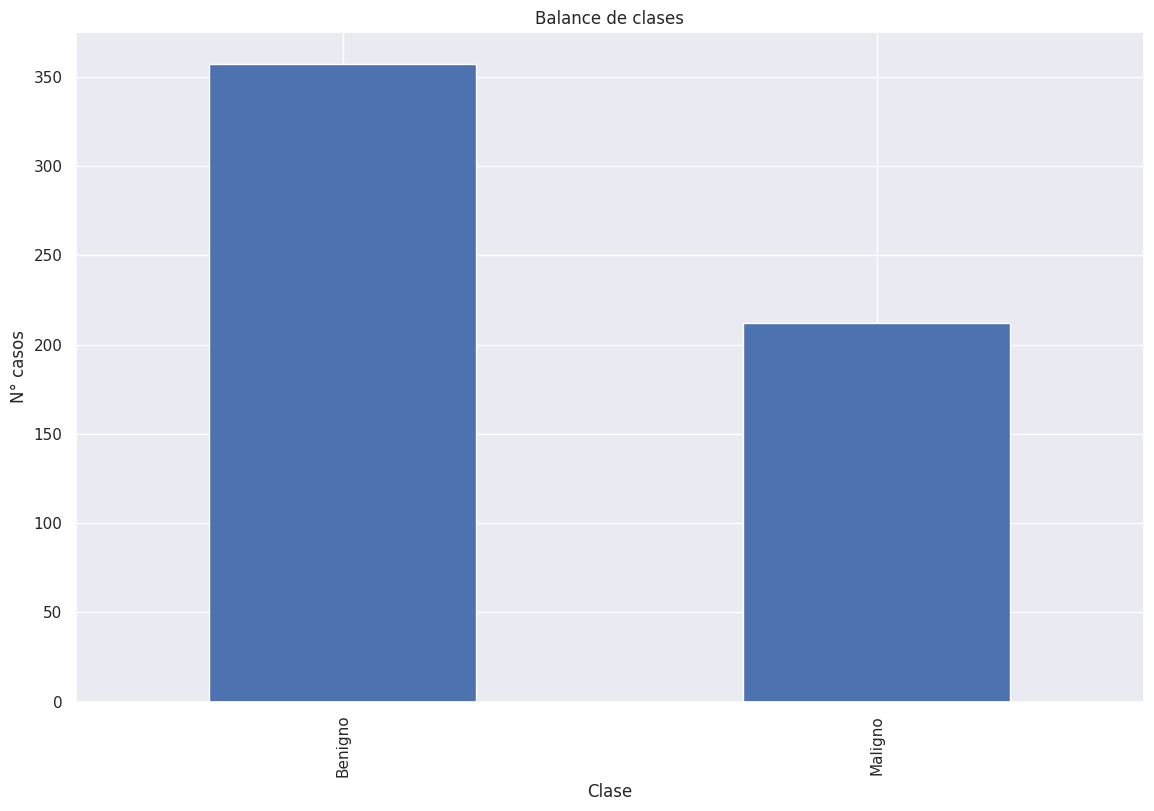

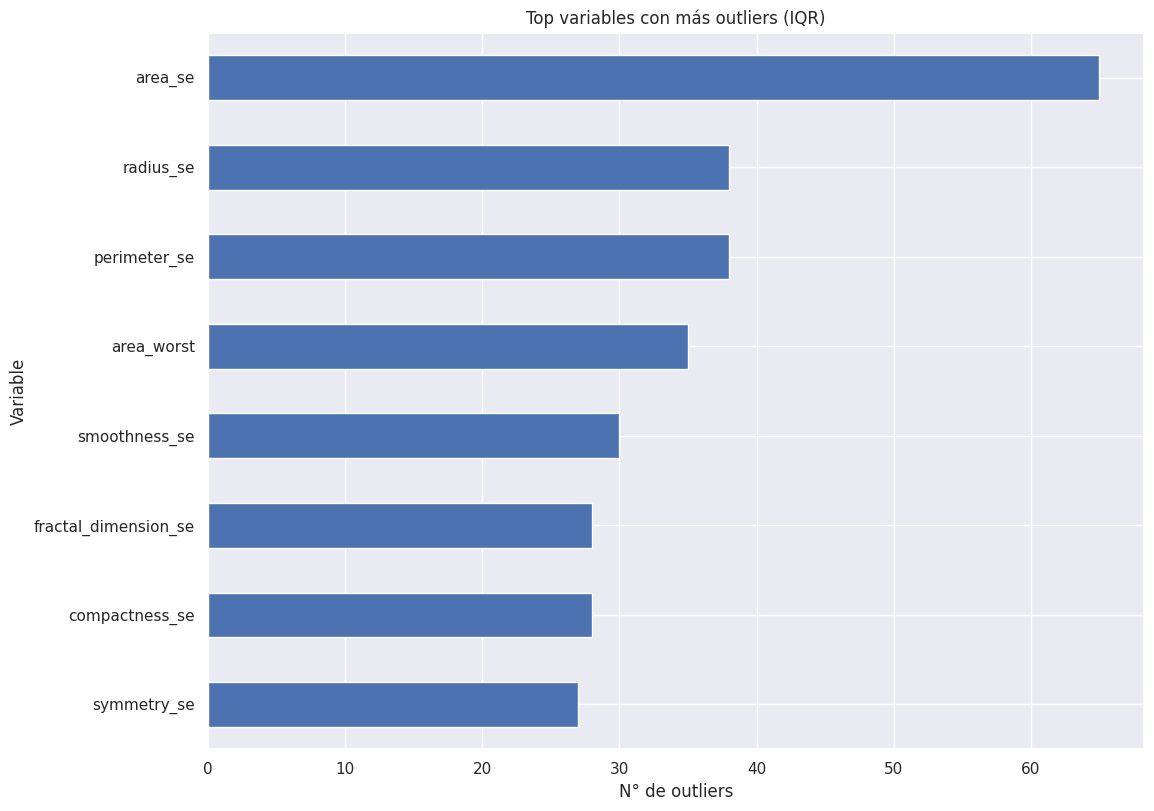

Top variables más discriminativas por |corr| con diagnosis:


,|corr|
concave points_worst,0.794
perimeter_worst,0.783
concave points_mean,0.777
radius_worst,0.776
perimeter_mean,0.743
area_worst,0.734
radius_mean,0.730
area_mean,0.709
concavity_mean,0.696
concavity_worst,0.660


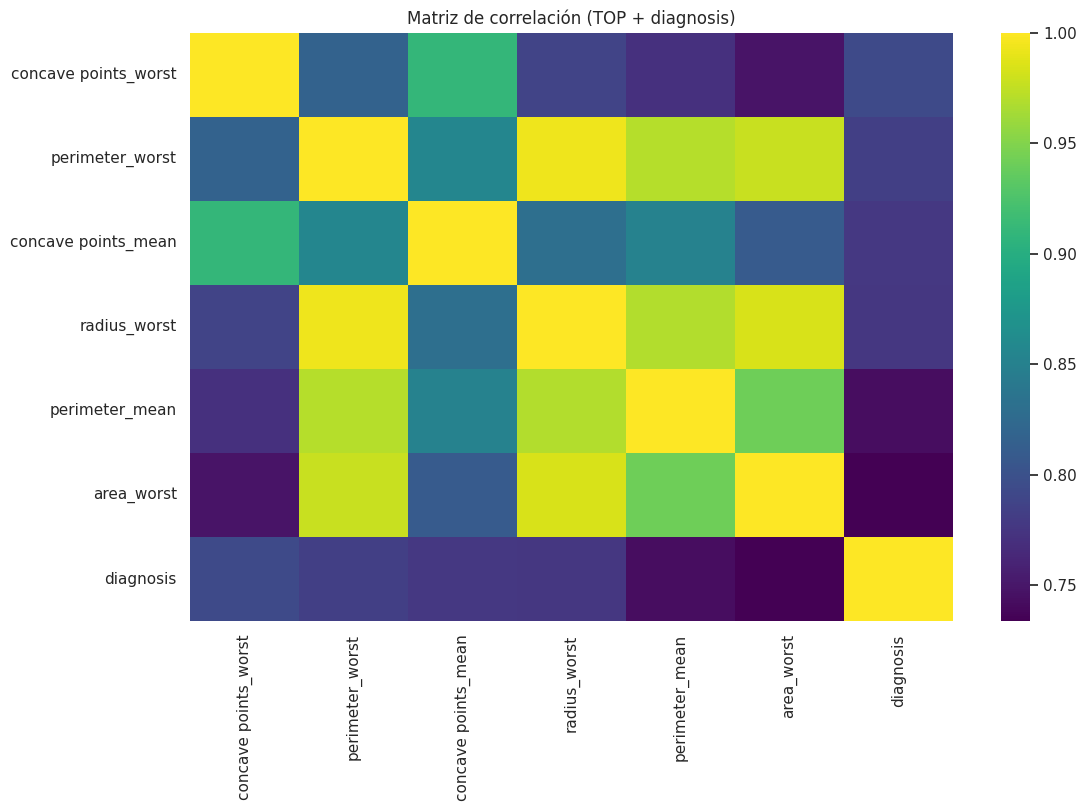

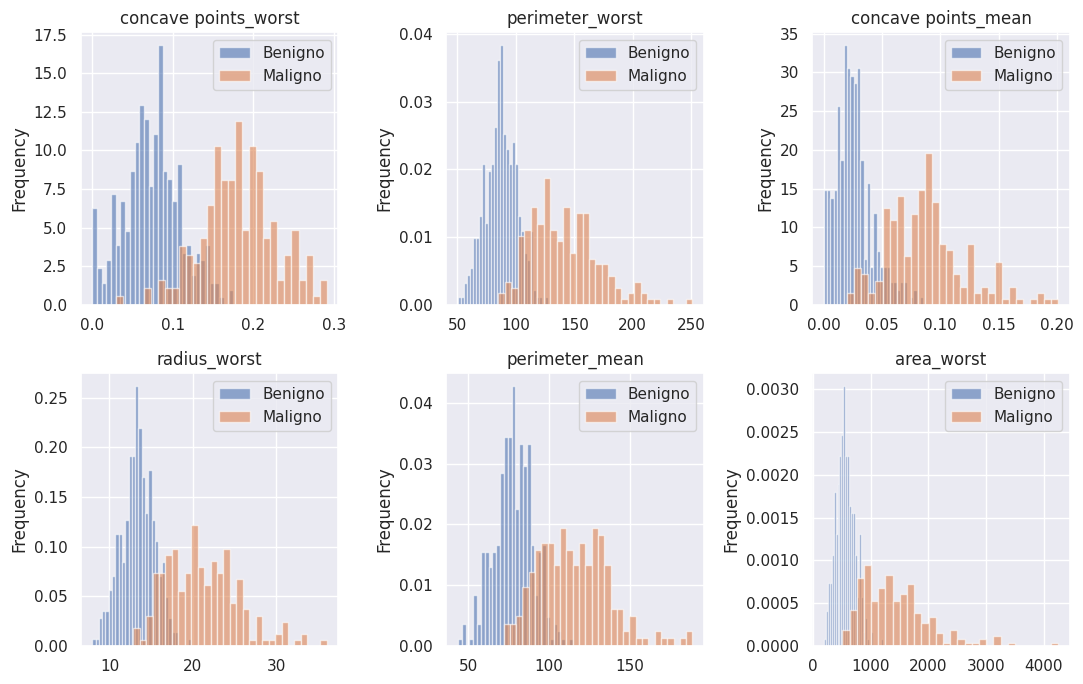

/tmp/ipython-input-2297747084.py:49: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([df[df[target]==0][col], df[df[target]==1][col]], labels=['Benigno','Maligno'])
/tmp/ipython-input-2297747084.py:49: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([df[df[target]==0][col], df[df[target]==1][col]], labels=['Benigno','Maligno'])
/tmp/ipython-input-2297747084.py:49: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([df[df[target]==0][col], df[df[target]==1][col]], labels=['Benigno','Maligno'])
/tmp/ipython-input-2297747084.py:49: MatplotlibDeprecationWarning: The 'labels' paramete

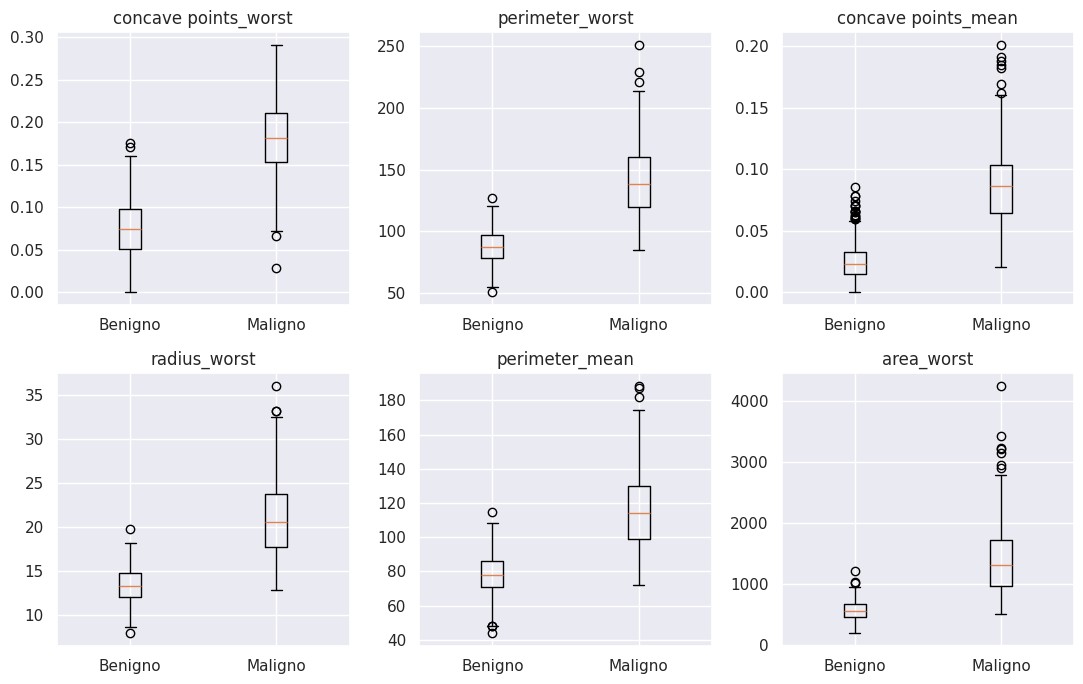

In [19]:
target = 'diagnosis'
Xcols = [c for c in df.columns if c != target]

# 1) Distribuciones & balance de clases
display(df[Xcols].describe().T.round(3).head(10))
ax = df[target].map({0:'Benigno',1:'Maligno'}).value_counts().plot(kind='bar')
ax.set_title('Balance de clases'); ax.set_xlabel('Clase'); ax.set_ylabel('N° casos')
plt.tight_layout(); plt.show()

# 2) Outliers por IQR (conteo)
def iqr_outliers(s):
    q1, q3 = np.percentile(s.dropna(), [25, 75]); iqr = q3-q1
    lo, hi = q1-1.5*iqr, q3+1.5*iqr
    return ((s<lo)|(s>hi)).sum()

out_cnt = pd.Series({c: iqr_outliers(df[c]) for c in Xcols}).sort_values(ascending=False)
(out_cnt.head(8).iloc[::-1]).plot(kind='barh')
plt.title('Top variables con más outliers (IQR)')
plt.xlabel('N° de outliers'); plt.ylabel('Variable')
plt.tight_layout(); plt.show()

# 3) Correlaciones (con target y entre features)
corr = df.corr(numeric_only=True)
corr_t = corr[target].drop(target).abs().sort_values(ascending=False)
top_feats = list(corr_t.head(6).index)  # usaremos pocas para graficar

print('Top variables más discriminativas por |corr| con diagnosis:')
display(corr_t.head(10).to_frame('|corr|').round(3))

# Heatmap entre TOP + target
sub = df[top_feats + [target]].corr(numeric_only=True)
sns.heatmap(sub, annot=False, cmap='viridis')
plt.title('Matriz de correlación (TOP + diagnosis)')
plt.tight_layout(); plt.show()

# 4) Diferencias Benigno vs Maligno: histogramas + boxplots
ncols = 3; nrows = int(np.ceil(len(top_feats)/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(11, 7)); axes = axes.ravel()
for i, col in enumerate(top_feats):
    ax = axes[i]
    df[df[target]==0][col].plot(kind='hist', bins=30, alpha=0.6, density=True, label='Benigno', ax=ax)
    df[df[target]==1][col].plot(kind='hist', bins=30, alpha=0.6, density=True, label='Maligno', ax=ax)
    ax.set_title(col); ax.legend()
for j in range(i+1, nrows*ncols): axes[j].axis('off')
plt.tight_layout(); plt.show()

fig, axes = plt.subplots(nrows, ncols, figsize=(11, 7)); axes = axes.ravel()
for i, col in enumerate(top_feats):
    axes[i].boxplot([df[df[target]==0][col], df[df[target]==1][col]], labels=['Benigno','Maligno'])
    axes[i].set_title(col)
for j in range(i+1, nrows*ncols): axes[j].axis('off')
plt.tight_layout(); plt.show()


Las variables con mayor capacidad discriminativa son aquellas que presentan una fuerte correlación con la variable objetivo diagnosis, mostrando distribuciones claramente diferenciadas entre tumores benignos y malignos. En este caso, destacan principalmente:
concave_points_worst, perimeter_worst, concave_points_mean, radius_worst, perimeter_mean y area_worst.

Estas variables están asociadas al tamaño y forma de los núcleos celulares, siendo mayores en tumores malignos. En los gráficos comparativos (histogramas y boxplots), se observa una separación clara entre clases, lo que evidencia su capacidad para distinguir entre ambos tipos de tumor. Además, la alta correlación positiva con el diagnóstico indica que a medida que aumenta el valor de estas características, crece la probabilidad de malignidad, por lo que se consideran las más relevantes para los modelos de clasificación.


2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


In [20]:
# Separar variables predictoras y objetivo
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

#  1) Normalización con StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertimos a DataFrame para mantener nombres de columnas
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=df.index)

# 2) Estrategia adicional: eliminar multicolinealidad
# Calculamos la matriz de correlación entre variables
corr_matrix = X_scaled.corr().abs()

# Tomamos el triángulo superior (para no duplicar pares)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Eliminamos variables con correlación > 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print("Variables eliminadas por alta correlación:", to_drop)

X_reduced = X_scaled.drop(columns=to_drop)

print(f"Dimensiones antes: {X_scaled.shape}, después: {X_reduced.shape}")

# 3) Verificamos nuevamente la correlación promedio
mean_corr_before = corr_matrix.mean().mean()
mean_corr_after = X_reduced.corr().abs().mean().mean()
print(f"Correlación promedio antes: {mean_corr_before:.3f}")
print(f"Correlación promedio después: {mean_corr_after:.3f}")


Variables eliminadas por alta correlación: ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']
Dimensiones antes: (569, 30), después: (569, 23)
Correlación promedio antes: 0.415
Correlación promedio después: 0.403


Se aplicó la normalización mediante StandardScaler para asegurar que todas las variables tuvieran la misma escala, con media 0 y desviación estándar 1. Esta elección se justifica porque las variables del conjunto presentan magnitudes muy distintas (por ejemplo, area_mean puede alcanzar miles, mientras que smoothness_mean apenas llega a 0.1), lo cual podría afectar el desempeño de los modelos de aprendizaje automático.

Además, se implementó una reducción de multicolinealidad, eliminando aquellas variables con correlación superior a 0.95. Las variables descartadas (perimeter_mean, area_mean, perimeter_se, area_se, radius_worst, perimeter_worst, area_worst) presentaban una fuerte redundancia con otras características geométricas, aportando información prácticamente duplicada.

Esta estrategia redujo el número de variables de 30 a 23, manteniendo la representatividad de los datos y disminuyendo el riesgo de sobreajuste. En conjunto, ambas etapas permiten obtener un conjunto de datos más estable, equilibrado y eficiente para el entrenamiento de los modelos posteriores.


3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


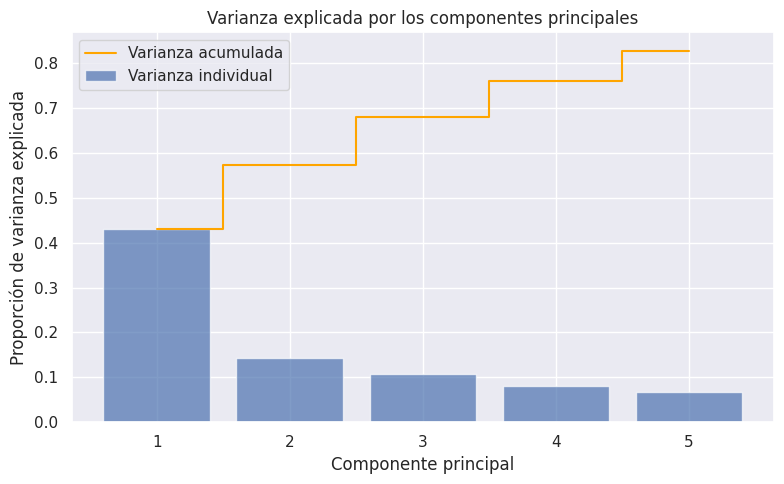

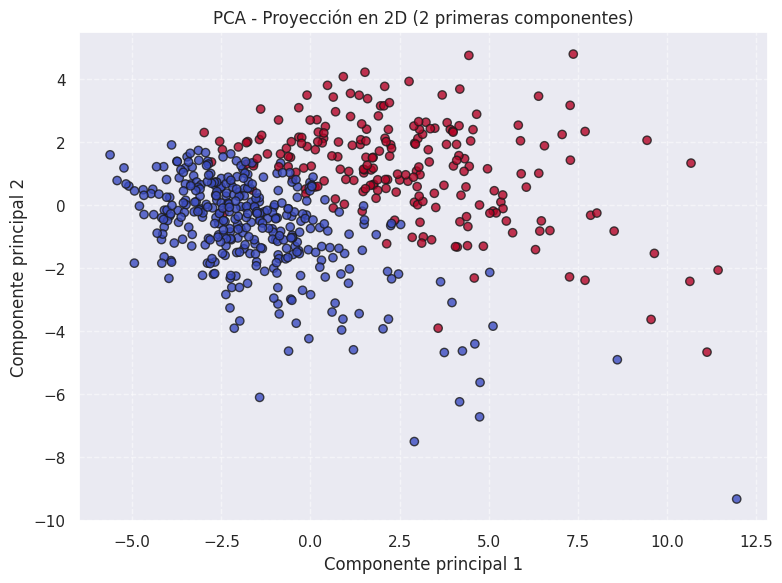

Varianza explicada por cada componente:
PC1: 0.431
PC2: 0.142
PC3: 0.107
PC4: 0.080
PC5: 0.067

Varianza acumulada (primeras 2): 0.573
Varianza acumulada (primeras 5): 0.827


In [21]:
# Aplicamos PCA sobre los datos preprocesados
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_reduced)

# Varianza explicada por cada componente
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

#  1) Gráfico de varianza explicada
plt.figure(figsize=(8,5))
plt.bar(range(1,6), var_exp, alpha=0.7, label='Varianza individual')
plt.step(range(1,6), cum_var_exp, where='mid', label='Varianza acumulada', color='orange')
plt.xlabel('Componente principal')
plt.ylabel('Proporción de varianza explicada')
plt.title('Varianza explicada por los componentes principales')
plt.legend()
plt.tight_layout()
plt.show()

# 2) Visualización 2D con las dos primeras componentes
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.8, edgecolor='k')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('PCA - Proyección en 2D (2 primeras componentes)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#  3) Imprimir varianza total explicada por los primeros componentes
print("Varianza explicada por cada componente:")
for i, v in enumerate(var_exp, start=1):
    print(f"PC{i}: {v:.3f}")

print(f"\nVarianza acumulada (primeras 2): {cum_var_exp[1]:.3f}")
print(f"Varianza acumulada (primeras 5): {cum_var_exp[-1]:.3f}")


El PCA redujo la dimensionalidad del conjunto conservando gran parte de la información. Las dos primeras componentes explican un 57,3 % de la varianza, y las cinco primeras alcanzan un 82,7 %, lo que indica una buena representación del conjunto original.

En la proyección 2D (PC1 vs. PC2) se observa una separación clara entre tumores benignos y malignos, con solo una leve superposición. Esto demuestra que el PCA logró capturar las diferencias más relevantes entre ambas clases, principalmente asociadas al tamaño y forma de los núcleos celulares.


4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.



===== Logistic Regression =====
Mejores hiperparámetros: {'C': 1, 'solver': 'liblinear'}
Accuracy: 0.965 | Precision: 0.975 | Recall: 0.929 | F1: 0.951 | AUC: 0.995
Matriz de confusión:
 [[71  1]
 [ 3 39]]

===== SVM =====
Mejores hiperparámetros: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.965 | Precision: 1.000 | Recall: 0.905 | F1: 0.950 | AUC: 0.993
Matriz de confusión:
 [[72  0]
 [ 4 38]]

===== Random Forest =====
Mejores hiperparámetros: {'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.947 | Precision: 0.974 | Recall: 0.881 | F1: 0.925 | AUC: 0.992
Matriz de confusión:
 [[71  1]
 [ 5 37]]


,Modelo,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.965,0.975,0.929,0.951,0.995
1,SVM,0.965,1.000,0.905,0.950,0.993
2,Random Forest,0.947,0.974,0.881,0.925,0.992


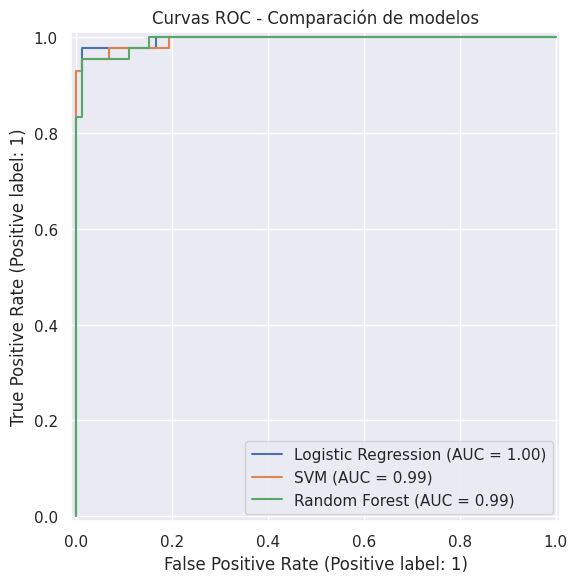

In [25]:
from sklearn.metrics import roc_auc_score
#  1) División de datos
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)

# 2) Definir modelos y sus grillas de hiperparámetros
models = {
    'Logistic Regression': (LogisticRegression(max_iter=500),
                            {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}),

    'SVM': (SVC(probability=True),
            {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}),

    'Random Forest': (RandomForestClassifier(random_state=42),
                      {'n_estimators': [100, 200],
                       'max_depth': [4, 6, 8, None],
                       'min_samples_split': [2, 5, 10]})
}

# 3) Entrenar modelos con GridSearchCV
best_models = {}
results = []

for name, (model, params) in models.items():
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    best_models[name] = best_model

    # Predicciones y métricas
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    results.append([name, acc, prec, rec, f1, auc])

    print(f"\n===== {name} =====")
    print(f"Mejores hiperparámetros: {grid.best_params_}")
    print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f} | AUC: {auc:.3f}")
    print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

# 4) Comparar resultados
results_df = pd.DataFrame(results, columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'])
display(results_df.sort_values(by='AUC', ascending=False).round(3))

#  5) Curvas ROC comparativas
plt.figure(figsize=(8,6))
for name, model in best_models.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())
plt.title("Curvas ROC - Comparación de modelos")
plt.tight_layout()
plt.show()


Los tres modelos alcanzaron un rendimiento excelente (AUC ≈ 0.99). Sin embargo, la Regresión Logística mostró el mejor equilibrio entre precisión (0.975) y recall (0.929), logrando además el mayor AUC (0.995). Por ello, se considera el modelo con mejor compromiso entre precisión y generalización.


5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



El modelo más apropiado para este conjunto de datos fue la Regresión Logística, ya que logró el mejor equilibrio entre precisión y recall, con un desempeño estable y alta capacidad de generalización.

El preprocesamiento (normalización y eliminación de multicolinealidad) y la reducción de dimensionalidad mediante PCA contribuyeron a mejorar la estabilidad y eficiencia de los modelos, evitando redundancias y sobreajuste.

En un escenario real de diagnóstico asistido por machine learning, se podrían aplicar técnicas de validación más amplias o ensambles de modelos para aumentar la robustez del sistema y asegurar decisiones más confiables para los pacientes.